<a href="https://colab.research.google.com/github/ankitg-02/Credit-Card-Transaction-Analysis/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'/content/Credit card transactions - India - Simple.csv')
credit=pd.DataFrame(data)
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [3]:
(credit.isnull().sum()/len(credit))*100

index        0.0
City         0.0
Date         0.0
Card Type    0.0
Exp Type     0.0
Gender       0.0
Amount       0.0
dtype: float64

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
credit['Date']= pd.to_datetime(credit['Date'])

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      26052 non-null  int64         
 1   City       26052 non-null  object        
 2   Date       26052 non-null  datetime64[ns]
 3   Card Type  26052 non-null  object        
 4   Exp Type   26052 non-null  object        
 5   Gender     26052 non-null  object        
 6   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


In [7]:
credit['Date']=credit['Date'].dt.date

In [8]:
credit.sample(5)

,index,City,Date,Card Type,Exp Type,Gender,Amount
5225,5225,"Greater Mumbai, India",2014-11-08,Signature,Entertainment,M,165775
13365,13365,"Delhi, India",2013-10-18,Signature,Entertainment,F,68008
20254,20254,"Jaipur, India",2014-07-26,Gold,Food,F,146149
9822,9822,"Ahmedabad, India",2014-06-09,Gold,Bills,F,292848
23744,23744,"Jaipur, India",2014-11-23,Platinum,Entertainment,F,91245


In [9]:
credit.describe(include='all')

,index,City,Date,Card Type,Exp Type,Gender,Amount
count,26052.000000,26052,26052,26052,26052,26052,26052.000000
unique,NaN,986,600,4,6,2,NaN
top,NaN,"Bengaluru, India",2014-09-20,Silver,Food,F,NaN
freq,NaN,3552,65,6840,5463,13680,NaN
mean,13025.500000,NaN,NaN,NaN,NaN,NaN,156411.537425
std,7520.708943,NaN,NaN,NaN,NaN,NaN,103063.254287
min,0.000000,NaN,NaN,NaN,NaN,NaN,1005.000000
25%,6512.750000,NaN,NaN,NaN,NaN,NaN,77120.250000
50%,13025.500000,NaN,NaN,NaN,NaN,NaN,153106.500000
75%,19538.250000,NaN,NaN,NaN,NaN,NaN,228050.000000


In [10]:
for i in credit.columns:
  print(i,credit[i].unique())

index [    0     1     2 ... 26049 26050 26051]
City ['Delhi, India' 'Greater Mumbai, India' 'Bengaluru, India'
 'Ahmedabad, India' 'Markapur, India' 'Mavoor, India' 'Sillod, India'
 'Nainital, India' 'Laharpur, India' 'Shenkottai, India'
 'Neyveli (TS), India' 'Kapadvanj, India' 'Arambagh, India'
 'Thana Bhawan, India' 'Kancheepuram, India' 'Sojat, India'
 'Karjat, India' 'Mohali, India' 'Narayanpet, India' 'Bhavnagar, India'
 'Viluppuram, India' 'Jamalpur, India' 'Udaipurwati, India'
 'Palanpur, India' 'Muzaffarpur, India' 'Taranagar, India'
 'Ambikapur, India' 'Mundi, India' 'Padrauna, India' 'Vijayapura, India'
 'Vrindavan, India' 'Byasanagar, India' 'Mudhol, India' 'Sohna, India'
 'Pune, India' 'Lakheri, India' 'Jehanabad, India' 'Shegaon, India'
 'Shikarpur Bulandshahr, India' 'Dalli-Rajhara, India' 'Mapusa, India'
 'Uthamapalayam, India' 'Nasirabad, India' 'Kapurthala, India'
 'Anand, India' 'Arwal, India' 'Nanded-Waghala, India' 'Nilambur, India'
 'Anjar, India' 'Hubli-Dharwad,

In [11]:
credit['City_imputation']=credit['City'].str.split(',',n=0,expand=True)[0]

In [12]:
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,City_imputation
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,Delhi
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,Greater Mumbai
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,Bengaluru
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,Greater Mumbai
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,Bengaluru


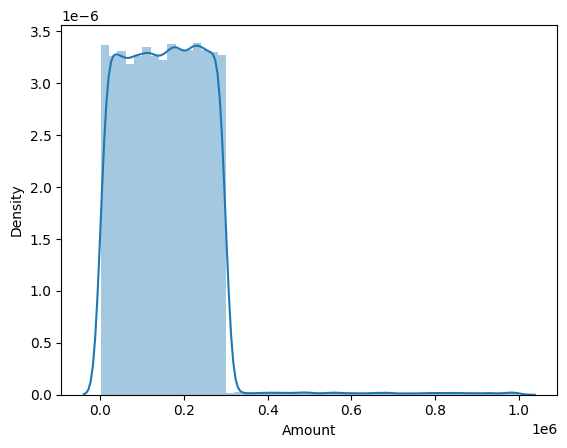

In [13]:
sns.distplot(credit['Amount'])
plt.show()

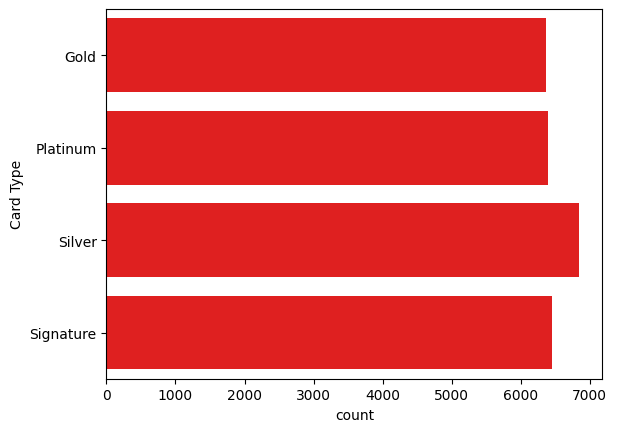

In [14]:
sns.countplot(credit['Card Type'],color='red')
plt.show()

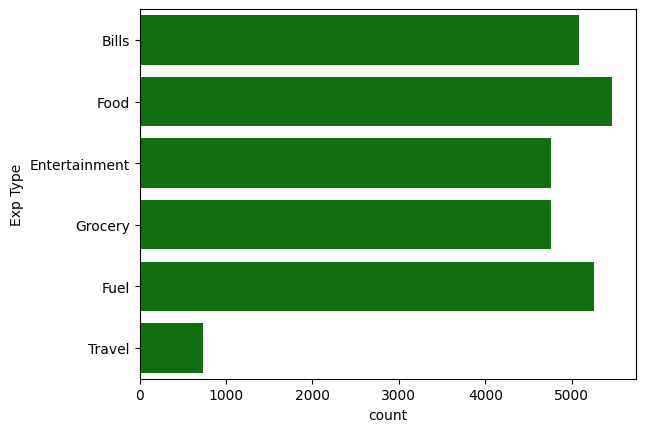

In [15]:
sns.countplot(credit['Exp Type'],color='green')
plt.show()

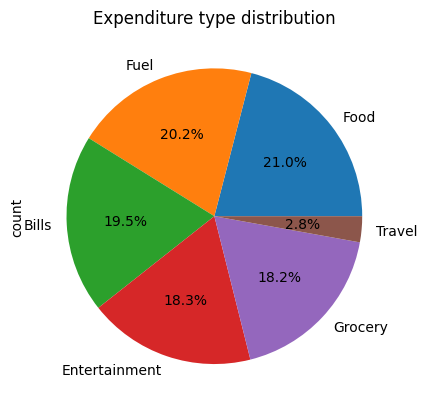

In [16]:
credit['Exp Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=credit['Exp Type'].value_counts().index)
plt.title('Expenditure type distribution')
plt.show()


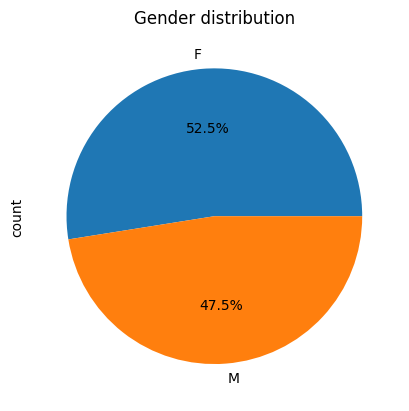

In [17]:
credit['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=credit['Gender'].value_counts().index)
plt.title('Gender distribution')
plt.show()


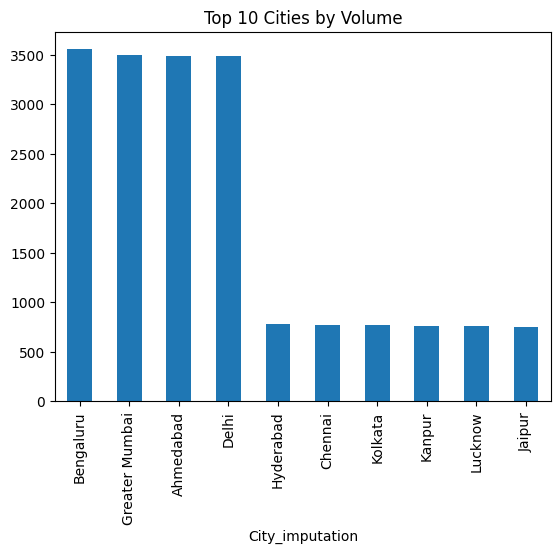

In [28]:
credit['City_imputation'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Cities by Volume')
plt.show()

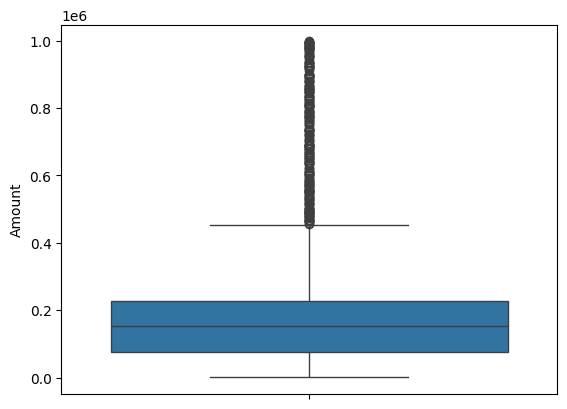

In [19]:
sns.boxplot(credit['Amount'])
plt.show()

In [20]:
credit['Credit_Score']=credit['Amount']//100
#implementing a Credit_Score feature as per their amount transaction (100rs=1 credit score)

In [21]:
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,City_imputation,Credit_Score
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,Delhi,824
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,Greater Mumbai,325
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,Bengaluru,1017
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,Greater Mumbai,1234
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,Bengaluru,1715


In [29]:
print("max credit score:",credit['Credit_Score'].max())
print("min credit score:",credit['Credit_Score'].min())
print("mean credit score:",credit['Credit_Score'].median())

max credit score: 9980
min credit score: 10
mean credit score: 1531.0


In [23]:
Credit_Status=[]
for i in credit['Credit_Score']:
  if i>10 and i<1500:
    Credit_Status.append('1')
  elif i>=1500 and i<5000:
    Credit_Status.append('2')
  else:
    Credit_Status.append('3')

In [24]:
credit['Credit_Status']=Credit_Status
#implement a new feature Credit status so as we can find easily how much people are in the fixed range

In [25]:
credit['Credit_Status'].value_counts()

Credit_Status
2    13094
1    12741
3      217
Name: count, dtype: int64

In [30]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            26052 non-null  int64 
 1   City             26052 non-null  object
 2   Date             26052 non-null  object
 3   Card Type        26052 non-null  object
 4   Exp Type         26052 non-null  object
 5   Gender           26052 non-null  object
 6   Amount           26052 non-null  int64 
 7   City_imputation  26052 non-null  object
 8   Credit_Score     26052 non-null  int64 
 9   Credit_Status    26052 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.0+ MB


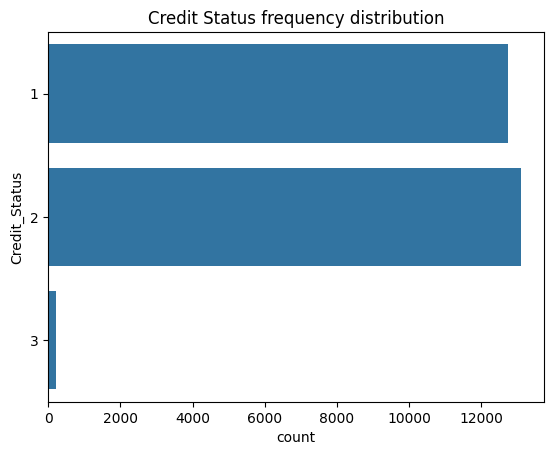

In [27]:
sns.countplot(credit['Credit_Status'])
plt.title('Credit Status frequency distribution')
plt.show()

In [32]:
credit.drop(columns='Credit_Status',axis=1,inplace=True)

In [33]:
credit.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,City_imputation,Credit_Score
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,Delhi,824
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,Greater Mumbai,325
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,Bengaluru,1017
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,Greater Mumbai,1234
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,Bengaluru,1715
